In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'C:\\Users\\Selva Kumar E\\Desktop\\IBM_'

In [3]:
car=pd.read_csv("Cars.csv")

In [4]:
car.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [5]:
car =car.iloc[:,[1,0,2,3,4]]

In [6]:
car.head()

,MPG,HP,VOL,SP,WT
0,53.700681,49,89,104.185353,28.762059
1,50.013401,55,92,105.461264,30.466833
2,50.013401,55,92,105.461264,30.193597
3,45.696322,70,92,113.461264,30.632114
4,50.504232,53,92,104.461264,29.889149


In [7]:
car.shape

(81, 5)

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MPG     81 non-null     float64
 1   HP      81 non-null     int64  
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [10]:
car.isnull().sum()

MPG    0
HP     0
VOL    0
SP     0
WT     0
dtype: int64

In [11]:
car.corr().MPG

MPG    1.000000
HP    -0.725038
VOL   -0.529057
SP    -0.687125
WT    -0.526759
Name: MPG, dtype: float64

<AxesSubplot:>

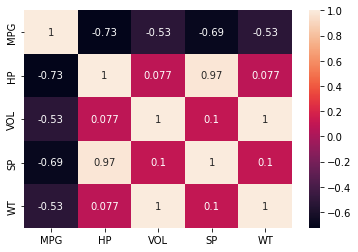

In [12]:
sns.heatmap(car.corr(),annot=True)

<AxesSubplot:xlabel='HP', ylabel='MPG'>

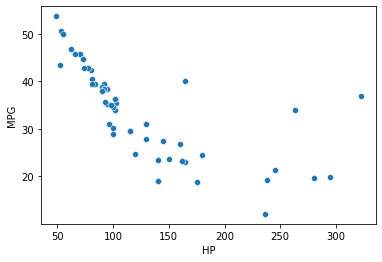

In [13]:
sns.scatterplot(car["HP"],car["MPG"])

<AxesSubplot:xlabel='VOL', ylabel='MPG'>

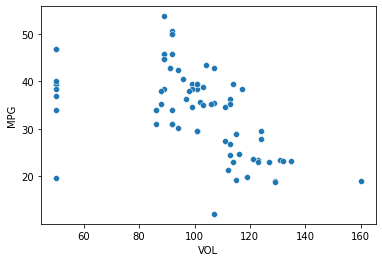

In [14]:
sns.scatterplot(car["VOL"],car["MPG"])

<AxesSubplot:xlabel='VOL', ylabel='MPG'>

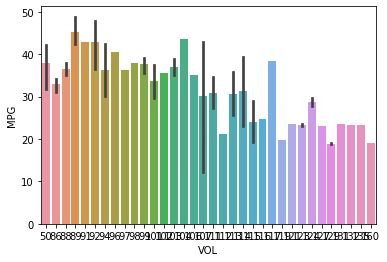

In [15]:
sns.barplot(car["VOL"],car["MPG"])

In [16]:
# spliting x and y
x=car.iloc[:,1:]
y=car.iloc[:,0]

In [17]:
# train test split
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
print(x_train.shape,x_test.shape)

(64, 4) (17, 4)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr_reg =LinearRegression()

In [22]:
lr_reg.fit(x_train,y_train)

LinearRegression()

In [23]:
x_test_pred=lr_reg.predict(x_test)

In [24]:
x_test_pred

array([33.25194201, 41.67282126, 37.34571718, 36.03030532, 40.73634756,
       35.85831389, 40.68418569, 31.78859887, 40.38431601, 40.1859865 ,
       32.60787495, 34.54417128, 23.43464652, 36.52921002, 24.35546583,
       35.57247482, 17.15238303])

In [25]:
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
print("R2score:",r2_score(y_test,x_test_pred))

R2score: 0.6749527236507014


In [27]:
print("MSE:",mean_squared_error(y_test,x_test_pred))

MSE: 31.964121489759837


In [28]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,x_test_pred)))

RMSE: 5.65368211785557


### Lasso

In [30]:
from sklearn.linear_model import Lasso,Ridge

In [31]:
#initialized lasso
lso=Lasso(alpha = 0.13,normalize=True)#hyperparameter turning

In [32]:
lso.fit(x_train,y_train)

Lasso(alpha=0.13, normalize=True)

In [33]:
lso_pred=lso.predict(x_test)

In [34]:
lso_pred

array([34.11205891, 40.95954608, 35.38467511, 36.24662197, 38.35874639,
       38.26151228, 39.07893474, 29.26235111, 40.15351938, 35.94814584,
       33.81749899, 32.86579756, 25.63043258, 36.26906061, 26.28722121,
       35.3212754 , 22.17089649])

In [35]:
coef=lso.coef_
coef #reduce the coef_to get the feature reduction

array([-0.07835881, -0.16419716, -0.        , -0.        ])

In [36]:
print("R2score:",r2_score(y_test,lso_pred))

R2score: 0.6671413454123338


In [37]:
print("MSE:",mean_squared_error(y_test,lso_pred))

MSE: 32.732267729340485


### Ridge

In [39]:
rg=Ridge(alpha=0.13,normalize=True)

In [40]:
rg.fit(x_train,y_train)

Ridge(alpha=0.13, normalize=True)

In [41]:
rg_pred=rg.predict(x_test)

In [42]:
rg_pred

array([34.02373875, 41.87735751, 35.37916785, 36.45224582, 38.70137152,
       38.81195815, 39.59295876, 29.34819247, 40.95755749, 35.66794534,
       33.81355131, 32.24976191, 24.48688506, 36.53773604, 25.21507136,
       35.40198791, 20.30034349])

In [43]:
rg.coef_

array([-0.07289298, -0.10195561, -0.05297001, -0.27304505])

In [44]:
print("R2score:",r2_score(y_test,rg_pred))

R2score: 0.7050333368216783


In [45]:
print("MSE:",mean_squared_error(y_test,rg_pred))

MSE: 29.006089093111346
